In [1]:
import sys

root = '../..'
sys.path.extend([f'{root}/apps'])

In [2]:
from torchvision.utils import save_image
import torch
from pathlib import Path
from matplotlib import pyplot as plt 

from tools.file import mkdir
from utils.torch_loader_all import LoaderTest
from tools.toml import load_option
from app import  init, mask_op, array2image

In [3]:
def get_opt(opt_name, base_name, train_name):
    opt = load_option(f'{root}/origin/{opt_name}')
    base_opt = load_option(f'{root}/options/{base_name}')
    model_opt = load_option(f'{root}/options/{train_name}')
    return opt, base_opt, model_opt


In [4]:
opt, base_opt, model_opt = get_opt('test.toml',
                                   'base512.toml',
                                   'train-new.toml')
print(opt)
loader = LoaderTest(**opt)


{'root': 'E:/kaggle/datasets/tests', 'mask': 'D:/kaggle/dataset/mask/testing_mask_dataset', 'fine_size': 512, 'batch_size': 1}


In [5]:
model_name = 'CSA-512'
beta = 1

model = init(model_name, beta, model_opt, base_opt)

save_dir = f'D:/BaiduNetdiskWorkspace/result/measure/{model_name}'
mkdir(save_dir)

initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
---------- Networks initialized -------------
UnetGeneratorCSA(
  (model): UnetSkipConnectionBlock_3(
    (model): Sequential(
      (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): UnetSkipConnectionBlock_3(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace=True)
          (1): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), dilation=(2, 2))
          (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (3): LeakyReLU(negative_slope=0.2, inplace=True)
          (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (6): UnetSkipConnectionBlock_3(
            (model): Sequential(
              (0): LeakyReLU(negat

In [6]:
valset = loader.valset()
maskset = loader.maskset()

In [7]:
def test(model, epoch, image, image_name, mask):
    model.load(epoch)
    image = image.cuda()
    mask = mask_op(mask)
    model.set_input(image, mask)
    model.set_gt_latent()
    model.test()
    real_A, real_B, fake_B = model.get_current_visuals()
    pic = (torch.cat([real_A, real_B, fake_B], dim=0) + 1) / 2.0
        
    save_image(pic, f"{save_dir}/{image_name}-epoch{epoch}.jpg", nrow=1)

    if epoch % 50 ==0:
        plt.figure(figsize=(6, 8))
        plt.subplot(1, 3, 1)
        x = array2image(real_A[0])
        plt.imshow(x)
        x = array2image(real_B[0])
        plt.subplot(1, 3, 2)
        plt.imshow(x)
        x = array2image(fake_B[0])
        plt.subplot(1, 3, 3)
        plt.imshow(x)
        plt.show()

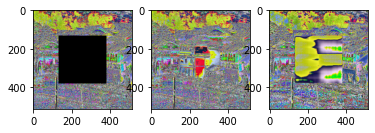

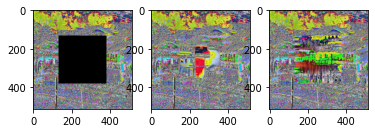

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [8]:
for (image, path), mask in zip(valset, maskset):
    for k in range(120):
        test(model, k, image, Path(path[0]).name, mask)



In [ ]:
a = 